# Association rules and Apriori Algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from pandas.plotting import parallel_coordinates
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/Admin/Desktop/ML/6/basket_analysis.csv')

In [3]:
df.drop(df.columns[0],axis=1,inplace=True)

In [4]:
df.shape

(999, 16)

We have 999 basket for us to compute the recommendation for each item that sold in the store. There are 16 items that sold in the shop.

In [5]:
df.mean()

Apple           0.383383
Bread           0.384384
Butter          0.420420
Cheese          0.404404
Corn            0.407407
Dill            0.398398
Eggs            0.384384
Ice cream       0.410410
Kidney Beans    0.408408
Milk            0.405405
Nutmeg          0.401401
Onion           0.403403
Sugar           0.409409
Unicorn         0.389389
Yogurt          0.420420
chocolate       0.421421
dtype: float64

We set the mininum support as 0.06, maximum number that being analysed in the basket is 3. We are doing first pruning and see what we get from the result

In [6]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df,
                            min_support = .006,
                            max_len = 3,
                            use_colnames = True)

In [7]:
# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets,
                            metric = 'support',
                            min_threshold=0.1)

In [8]:
#
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.2) &
                        (rules['lift'] > 1.0)]

In [9]:
filtered_rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
402,"(Dill, Unicorn)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764,0.359474
390,"(Dill, Milk)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446,0.367532
324,"(Dill, Cheese)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,0.364570
391,"(Dill, chocolate)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051,0.365033
260,"(Kidney Beans, Ice cream)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902,0.312125
...,...,...,...,...,...,...,...,...,...,...
243,(Butter),"(Apple, Sugar)",0.420420,0.182182,0.100100,0.238095,1.306907,0.023507,1.073386,0.405181
322,(Butter),"(Yogurt, Nutmeg)",0.420420,0.192192,0.100100,0.238095,1.238839,0.019299,1.060248,0.332642
369,(Yogurt),"(Kidney Beans, Corn)",0.420420,0.195195,0.100100,0.238095,1.219780,0.018036,1.056306,0.310881
321,(Yogurt),"(Butter, Nutmeg)",0.420420,0.198198,0.100100,0.238095,1.201299,0.016774,1.052365,0.289119


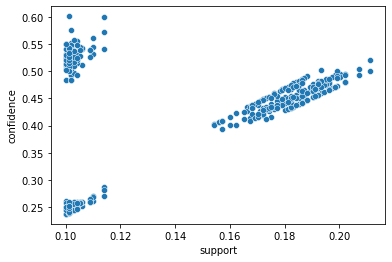

In [10]:
# Generate scatterplot confidence versus support
sns.scatterplot(x = "support", y = "confidence", data = filtered_rules)
plt.show()

With scatterplot, we can have quick glimpse, where the boundary should be and what metric should be set to filter out the frequent itemsets. 

In [11]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)]

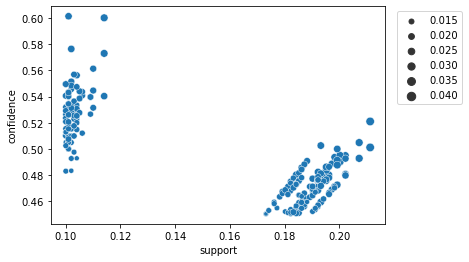

In [12]:
# Generate scatterplot confidence versus support

sns.scatterplot(x = "support", y = "confidence", size= 'leverage',data = filtered_rules)
plt.legend(bbox_to_anchor= (1.02, 1), loc='upper left',)
plt.show()

In [13]:
# add extra another rule where support more than 0.2 for given itemset
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)&
                        (rules['support']>0.195)]

In [14]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
66,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571,0.288629
67,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579,0.283728
68,(Butter),(Kidney Beans),0.420420,0.408408,0.202202,0.480952,1.177626,0.030499,1.139764,0.260247
69,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905,0.254963
70,(Milk),(Butter),0.405405,0.420420,0.198198,0.488889,1.162857,0.027757,1.133960,0.235537
71,(Butter),(Milk),0.420420,0.405405,0.198198,0.471429,1.162857,0.027757,1.124909,0.241639
72,(Butter),(Nutmeg),0.420420,0.401401,0.198198,0.471429,1.174457,0.029441,1.132484,0.256294
73,(Nutmeg),(Butter),0.401401,0.420420,0.198198,0.493766,1.174457,0.029441,1.144884,0.248150
74,(Butter),(Onion),0.420420,0.403403,0.197197,0.469048,1.162726,0.027598,1.123635,0.241472
75,(Onion),(Butter),0.403403,0.420420,0.197197,0.488834,1.162726,0.027598,1.133838,0.234584


In [15]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

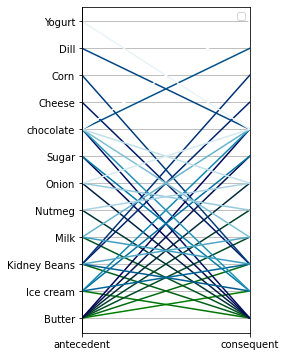

In [16]:
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(filtered_rules)
# Generate parallel coordinates plot
plt.figure(figsize=(3,6))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()

From the plot it seems like the butter can be used as cross-selling with other products, it also acts as something to be offered with antecedents that is low. Thus, the customers are more likely to buy them if the butter are offered with cheaper price if they buy the antecedents that sold less in a store

The sale transaction or count for each unique item approximately for this sample. We will dive into and see whether there is any difference or correlation between the baskets. Since the dataframe is already tabulated one hot data frame, we will straight away and use the dataset to be analyzed with apriori
## Apriori Algorithm
Little bit background introduction for `Apriori Algorithm`. The algorithm assumes that any subset of a frequent itemset must be frequent. Say in our cases, where {apple, unicorn, yoghurt} is frequent then {apple,yoghurt} is frequent. Whereas {apple,unicorn} is not frequent, then {apple,unicorn,yoghurt} is not frequent.

__SUPPORT__ =  A simple way to control complexity is to place a constraint that such rules must apply to some minimum percentage of the data <br>
__CONFIDENCE__ =  The probability that B occurs when A; it is p(B|A), which in association mining.<br>
__LIFT__ =  the co-occurrence of A and B is the probability that we actually see the two together, compared to the probability that we would see the two together if they were unrelated to (independent of) each other.<br>
__LEVERAGE__ =  alternative is to look at the difference between these quantities rather than their ratio.<br>
__CONVICTION__ = measure to ascertain the direction of the rule. Unlike lift, conviction is sensitive to the rule direction.

Just Support and Confidence as a parameter might be misleading for items that are too common/ popular in the basket. It is more likely that popular items are part of the same basket just because they are popular rather than anything else. 

# What is Apriori Algorithm?
Apriori Algorithm is one of the algorithm used for transaction data in Association Rule Learning. It allows us to mine the frequent itemset in order to generate association rule between them.
Example: list of items purchased by customers, details of website which are frequently visited etc.

This algorithm was introduced by Agrawal and Srikant in 1994.

Principles behind Apriori Algorithm

Subset of frequent itemset are frequent itemset.
Superset of infrequent itemset are infrequent itemset.
I know you are wondering this is too technical but don’t worry you will get it once we see how it works!

Apriori Algorithm has three parts:
1. Support
2. Confidence
3. Lift

Support( I )=
( Number of transactions containing item I ) / ( Total number of transactions )

Confidence( I1 -> I2 ) =
( Number of transactions containing I1 and I2 ) / ( Number of transactions containing I1 )

Lift( I1 -> I2 ) = ( Confidence( I1 -> I2 ) / ( Support(I2) )

